In [1]:
import numpy as np
import scipy
from scipy import linalg
from scipy import optimize
from scipy import stats
import matplotlib.pyplot as plt
import math

# 9. Numpy
## 9.5. Singular values

In [2]:
n = 200
p= .5
C = np.random.binomial(1, p ,size= (n, n))
print(C)
U,S,V = linalg.svd(C)
print(max(S))

[[0 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 0 0 ... 0 1 1]
 [1 1 0 ... 1 1 1]]
100.50983724865777


The largest singular value is similar to n*p

# 10. Scipy
## 10.1. Least squares

In [3]:
n,m=100,200
A = np.random.normal(0, 1, (m, n))
b= np.random.normal(0, 1,  m)
x = linalg.lstsq(A, b,)[0]
np.argmin(x)

90

## 10.2. Optimization

In [5]:
def fun(x):
    return (math.sin(x-2) ** 2) * math.exp(-x**2)

fun1=np.vectorize(fun)
x = np.linspace(-5,5)
a = optimize.fsolve(fun1,x) 
a.max()

42.206731248238405

## 10.3. Pairwise distances

In [6]:
n=10
m=10
X= np.random.normal(0, 1, (m, n))
distance = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        distance[i,j]= np.absolute(linalg.norm(X[i]-X[j])) # distance of ith row and jth row
distance

array([[0.        , 3.74703754, 4.41783061, 2.21090927, 5.11584272,
        5.37285529, 3.82432879, 4.04938781, 2.4224873 , 3.48304439],
       [3.74703754, 0.        , 5.4074137 , 3.58254266, 4.54403208,
        5.30122216, 3.79697784, 4.080424  , 3.71405081, 3.46835264],
       [4.41783061, 5.4074137 , 0.        , 4.13072112, 3.60128132,
        4.5036934 , 4.00395133, 4.48609908, 4.58548873, 5.51411143],
       [2.21090927, 3.58254266, 4.13072112, 0.        , 4.55387246,
        4.69862504, 3.76131437, 3.43653656, 2.87144878, 3.93089114],
       [5.11584272, 4.54403208, 3.60128132, 4.55387246, 0.        ,
        5.27445677, 5.0220084 , 4.94510495, 5.40886818, 5.52608749],
       [5.37285529, 5.30122216, 4.5036934 , 4.69862504, 5.27445677,
        0.        , 4.60928873, 4.72828265, 4.73471091, 5.75813651],
       [3.82432879, 3.79697784, 4.00395133, 3.76131437, 5.0220084 ,
        4.60928873, 0.        , 4.69268204, 3.17128234, 3.39666127],
       [4.04938781, 4.080424  , 4.4860990

# 11. Matplotlib
## 11.1. Plotting a function

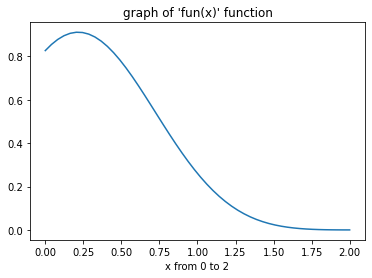

In [8]:
def fun(x):
    return (math.sin(x-2) ** 2) * math.exp(-x**2)

fun1= np.vectorize(fun)
x= np.linspace(0,2)
plt.plot(x,fun1(x))
plt.xlabel('x from 0 to 2') 
plt.title("graph of 'fun(x)' function")
plt.show()

## 11.2.  Data

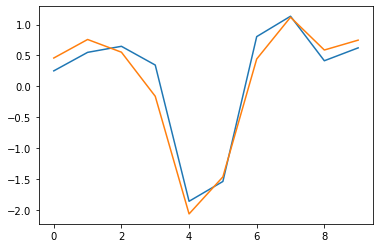

In [10]:
X= np.random.normal(0, 1, (20, 10))
b= np.random.normal(0,1, 10)
z=np.random.normal(0, 1, 20)
y= X@b + z

b1 = linalg.lstsq(X, y,)[0]

plt.plot(b1)
plt.plot(b)

## 11.3. Histogram and density estimation

(array([ 317.,  374.,  452.,  620.,  651.,  679.,  763., 1016., 1629.,
        3499.]),
 array([3.05028826e-04, 4.05640116e-02, 8.08229943e-02, 1.21081977e-01,
        1.61340960e-01, 2.01599943e-01, 2.41858925e-01, 2.82117908e-01,
        3.22376891e-01, 3.62635874e-01, 4.02894856e-01]),
 <BarContainer object of 10 artists>)

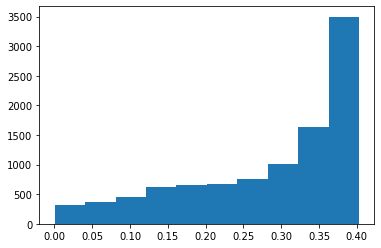

In [11]:
z=np.random.normal(0,1, 10000)
positions = np.vstack([z.ravel()])
kernel =stats.gaussian_kde(z)
Z = np.reshape(kernel(positions).transpose(), z.shape)

counts, bins = np.histogram(Z)
plt.hist(bins[:-1], bins, weights=counts)